# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/base_dados.csv')
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [10]:
1.1
df = pd.get_dummies(df, drop_first=True)
df = df.dropna()
X = df.drop('mau', axis=1)
y = df['mau']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'Tamanho do conjunto de treinamento: {X_train.shape}')
print(f'Tamanho do conjunto de validação: {X_test.shape}')

Tamanho do conjunto de treinamento: (11655, 28)
Tamanho do conjunto de validação: (4995, 28)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [27]:
#2.1 Definir o modelo de árvore de decisão
model = DecisionTreeClassifier(random_state=42)
#2.2 Definir o modelo de árvore de decisão
model = DecisionTreeClassifier(random_state=42)
#2.3 Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)
#2.4 Produzir uma visualização da matriz de classificação (ou matriz de confusão)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
#2.5 Calcular a acurácia na base de treinamento
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia na base de treinamento: {accuracy:.2f}')

[[4813   74]
 [  80   28]]
Acurácia na base de treinamento: 0.97


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

[[4813   74]
 [  80   28]]
Acurácia na base de teste: 0.97


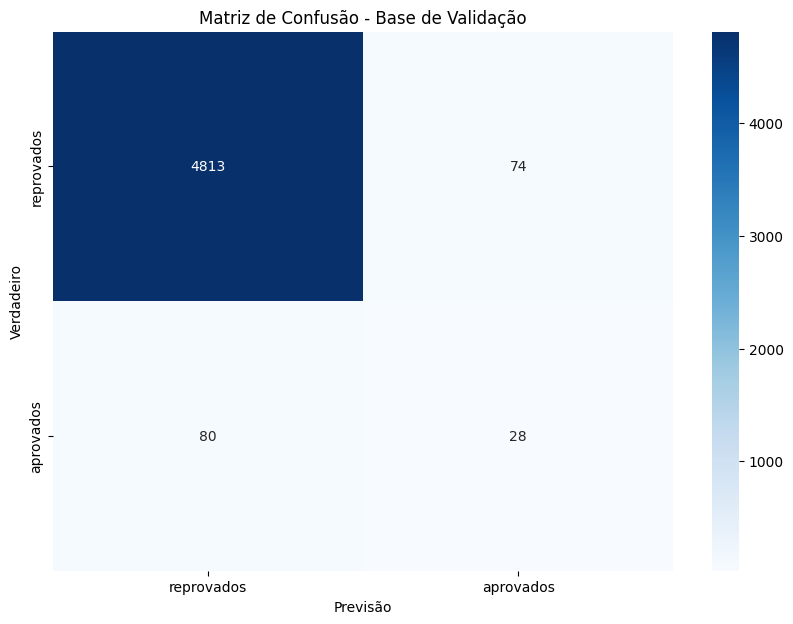

Proporção de proponentes classificados como "bons": 0.00


In [33]:
#3.1 Classificar a base de teste de acordo com a árvore que você treinou no item 2.
y_pred_test = model.predict(X_test)
#3.2 Produzir a visualização da matriz de confusão para a base de teste.
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)
#3.3 Calcular a acurácia da base de teste.
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Acurácia na base de teste: {accuracy_test:.2f}')
#3.4
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['reprovados', 'aprovados'], yticklabels=['reprovados', 'aprovados'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Base de Validação')
plt.show()
#3.5
proporcao_bons = (y_test == 'bons').mean()
print(f'Proporção de proponentes classificados como "bons": {proporcao_bons:.2f}')